In [2]:
# Importamos las librerías necesarias
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.utils.data import TensorDataset, DataLoader
import torchvision
from torchvision import models, transforms
from torchvision.models import (
    vgg16, VGG16_Weights,
    convnext_tiny, ConvNeXt_Tiny_Weights,
    convnext_base, ConvNeXt_Base_Weights,
    resnet18, ResNet18_Weights,
    densenet121, DenseNet121_Weights
)
from sklearn.metrics import precision_score, recall_score, f1_score
from PreprocesamientoImagenes import procesar_imagenes

<h3>1º: Carga y procesamiento de los datos<h3>

In [6]:
# Rutas a los archivos

madison_nudo_5_2_defectos=r"C:\Users\unidad-epa\Desktop\Scripts CATEC\Clasificación\DATOS\MADISON_Nudo5\MADISON_Nudo5-2\Defectos"
madison_nudo_5_2_no_defectos= r"C:\Users\unidad-epa\Desktop\Scripts CATEC\Clasificación\DATOS\MADISON_Nudo5\MADISON_Nudo5-2\No defectos"

madison_nudo_5_1_defectos=r"C:\Users\unidad-epa\Desktop\Scripts CATEC\Clasificación\DATOS\MADISON_Nudo5\MADISON_Nudo5-1\Defectos"
madison_nudo_5_1_no_defectos= r"C:\Users\unidad-epa\Desktop\Scripts CATEC\Clasificación\DATOS\MADISON_Nudo5\MADISON_Nudo5-1\No defectos"

Scinova_defectos=r"C:\Users\unidad-epa\Desktop\Scripts CATEC\Clasificación\DATOS\SCINOVA_a_clasificar\Defectos"
Scinova_no_defectos=r"C:\Users\unidad-epa\Desktop\Scripts CATEC\Clasificación\DATOS\SCINOVA_a_clasificar\No defectos"

Madison_Biobam_sin_defectos_1=r"C:\Users\unidad-epa\Desktop\Scripts CATEC\Clasificación\DATOS\MADISON_Biobam_SinDefectos-1"
Madison_Biobam_sin_defectos_2=r"C:\Users\unidad-epa\Desktop\Scripts CATEC\Clasificación\DATOS\MADISON_Biobam_SinDefectos-2"
Madison_Biobam_sin_defectos_3=r"C:\Users\unidad-epa\Desktop\Scripts CATEC\Clasificación\DATOS\MADISON_Biobam_SinDefectos-3"

#Probetas originales

#Defectos

Probetas_defectos_1=r"C:\Users\unidad-epa\Desktop\Scripts CATEC\Clasificación\DATOS\Probetas_originales_clasificadas\DED_308L_EST1\Defectos"
Probetas_defectos_2=r"C:\Users\unidad-epa\Desktop\Scripts CATEC\Clasificación\DATOS\Probetas_originales_clasificadas\DED_308L_EST2\Defectos"
Probeta_defectos_3=r"C:\Users\unidad-epa\Desktop\Scripts CATEC\Clasificación\DATOS\Probetas_originales_clasificadas\DED_308L_EST3\Defectos"
Probetas_defectos_4=r"C:\Users\unidad-epa\Desktop\Scripts CATEC\Clasificación\DATOS\Probetas_originales_clasificadas\ENG_308L_EST1\Defectos"
Probeta_defectos_5=r"C:\Users\unidad-epa\Desktop\Scripts CATEC\Clasificación\DATOS\Probetas_originales_clasificadas\ENG_308L_EST2\Defectos"
Probeta_defectos_6=r"C:\Users\unidad-epa\Desktop\Scripts CATEC\Clasificación\DATOS\Probetas_originales_clasificadas\ENG_208L_EST3\Defectos"



# No defectos

Probeta_no_defectos_1=r"C:\Users\unidad-epa\Desktop\Scripts CATEC\Clasificación\DATOS\Probetas_originales_clasificadas\DED_308L_EST1\No defectos"
Probeta_no_defectos_2=r"C:\Users\unidad-epa\Desktop\Scripts CATEC\Clasificación\DATOS\Probetas_originales_clasificadas\DED_308L_EST2\No defectos"
Probeta_no_defectos_3=r"C:\Users\unidad-epa\Desktop\Scripts CATEC\Clasificación\DATOS\Probetas_originales_clasificadas\DED_308L_EST3\No defectos"
Probeta_no_defectos_4=r"C:\Users\unidad-epa\Desktop\Scripts CATEC\Clasificación\DATOS\Probetas_originales_clasificadas\ENG_208L_EST3\No defectos"
Probeta_no_defectos_5=r"C:\Users\unidad-epa\Desktop\Scripts CATEC\Clasificación\DATOS\Probetas_originales_clasificadas\ENG_308L_EST1\No defectos"
Probeta_no_defectos_6=r"C:\Users\unidad-epa\Desktop\Scripts CATEC\Clasificación\DATOS\Probetas_originales_clasificadas\ENG_308L_EST2\No defectos"
Probeta_no_defectos_7=r"C:\Users\unidad-epa\Desktop\Scripts CATEC\Clasificación\DATOS\Probetas_originales_clasificadas\DED_H11_EST1\No defectos"
Probeta_no_defectos_8=r"C:\Users\unidad-epa\Desktop\Scripts CATEC\Clasificación\DATOS\Probetas_originales_clasificadas\DED_H11_EST2\No defectos"
Probeta_no_defectos_9=r"C:\Users\unidad-epa\Desktop\Scripts CATEC\Clasificación\DATOS\Probetas_originales_clasificadas\DED_H11_EST3\No defectos"


# Archivos de otro material, vamos a probar si el modelo funciona con otros materiales


airbus_cata_defectos=r"C:\Users\unidad-epa\Desktop\Scripts CATEC\Clasificación\DATOS\Original\AIRBUS CATA V_defectos"
airbus_cata_no_defectos=r"C:\Users\unidad-epa\Desktop\Scripts CATEC\Clasificación\DATOS\Original\AIRBUS CATA V_no defectos"

probeta_defectos=r"C:\Users\unidad-epa\Desktop\Scripts CATEC\Clasificación\DATOS\original\MADISON_ProbDefectos"

# NUEVA VALIDACION, Vamos a añadir alguna más
probeta_1_anillo_defectos=r"C:\Users\unidad-epa\Desktop\Scripts CATEC\Clasificación\DATOS\Prueba_Anillos\Probeta_anillo_1\Defectos"
probeta_1_anillo_no_defectos=r"C:\Users\unidad-epa\Desktop\Scripts CATEC\Clasificación\DATOS\Prueba_Anillos\Probeta_anillo_1\No defectos"

probeta_2_anillo_defectos=r"C:\Users\unidad-epa\Desktop\Scripts CATEC\Clasificación\DATOS\Prueba_Anillos\Probeta_anillo_2\Defectos"
probeta_2_anillo_no_defectos=r"C:\Users\unidad-epa\Desktop\Scripts CATEC\Clasificación\DATOS\Prueba_Anillos\Probeta_anillo_2\No defectos"

probeta_no_anillo_defectos=r"C:\Users\unidad-epa\Desktop\Scripts CATEC\Clasificación\DATOS\Prueba_Anillos\Probeta_no_anillo\Defectos"
probeta_no_anillo_no_defectos=r"C:\Users\unidad-epa\Desktop\Scripts CATEC\Clasificación\DATOS\Prueba_Anillos\Probeta_no_anillo\No defectos"

# Cargamos las imágenes y las ajustamos a las dimensiones que espera el modelo.

#   Pieza 1: Nudos Madison

madison_nudo_5_2_defectos_np = procesar_imagenes(madison_nudo_5_2_defectos, (224, 224))
madison_nudo_5_2_no_defectos_np = procesar_imagenes(madison_nudo_5_2_no_defectos, (224, 224))
madison_nudo_5_1_defectos_np = procesar_imagenes(madison_nudo_5_1_defectos, (224, 224))
madison_nudo_5_1_no_defectos_np = procesar_imagenes(madison_nudo_5_1_no_defectos, (224, 224))

# Pieza 2: Scinova
scinova_defectos_np = procesar_imagenes(Scinova_defectos, (224, 224))
scinova_no_defectos_np = procesar_imagenes(Scinova_no_defectos, (224, 224))

# Pieza 3: madison_biobam
madison_biobam_sin_defectos_1_np = procesar_imagenes(Madison_Biobam_sin_defectos_1, (224, 224))
madison_biobam_sin_defectos_2_np = procesar_imagenes(Madison_Biobam_sin_defectos_2, (224, 224))
madison_biobam_sin_defectos_3_np = procesar_imagenes(Madison_Biobam_sin_defectos_3, (224, 224))

probetas_defectos_1_np = procesar_imagenes(Probetas_defectos_1, (224, 224))
probetas_defectos_2_np = procesar_imagenes(Probetas_defectos_2, (224, 224))
probetas_defectos_3_np = procesar_imagenes(Probeta_defectos_3, (224, 224))
probetas_defectos_4_np = procesar_imagenes(Probetas_defectos_4, (224, 224))
probetas_defectos_5_np = procesar_imagenes(Probeta_defectos_5, (224, 224))
probetas_defectos_6_np = procesar_imagenes(Probeta_defectos_6, (224, 224))

probetas_no_defectos_1_np = procesar_imagenes(Probeta_no_defectos_1, (224, 224))
probetas_no_defectos_2_np = procesar_imagenes(Probeta_no_defectos_2, (224, 224))
probetas_no_defectos_3_np = procesar_imagenes(Probeta_no_defectos_3, (224, 224))
probetas_no_defectos_4_np = procesar_imagenes(Probeta_no_defectos_4, (224, 224))
probetas_no_defectos_5_np = procesar_imagenes(Probeta_no_defectos_5, (224, 224))
probetas_no_defectos_6_np= procesar_imagenes(Probeta_no_defectos_6, (224, 224))
probetas_no_defectos_7_np = procesar_imagenes(Probeta_no_defectos_7, (224, 224))
probetas_no_defectos_8_np = procesar_imagenes(Probeta_no_defectos_8, (224, 224))
probetas_no_defectos_9_np= procesar_imagenes(Probeta_no_defectos_9, (224, 224))


validacion_defectos_np_1 = procesar_imagenes(probeta_1_anillo_defectos, (224, 224))
validacion_defectos_np_2 = procesar_imagenes(probeta_2_anillo_defectos, (224, 224))
validacion_defectos_np_3 = procesar_imagenes(probeta_no_anillo_defectos, (224, 224))

validacion_no_defectos_np_1 = procesar_imagenes(probeta_1_anillo_no_defectos, (224, 224))
validacion_no_defectos_np_2 = procesar_imagenes(probeta_2_anillo_no_defectos, (224, 224))
validacion_no_defectos_np_3 = procesar_imagenes(probeta_no_anillo_no_defectos, (224, 224))


In [ ]:
# Preparamos los arrrays de entrenamiento y validación

# Madison
madison_no_defectos = np.concatenate((madison_biobam_sin_defectos_1_np, madison_biobam_sin_defectos_2_np, madison_biobam_sin_defectos_3_np), axis=0)
madison_nudo_defectos = np.concatenate((madison_nudo_5_2_defectos_np, madison_nudo_5_1_defectos_np), axis=0)
madison_nudo_no_defectos = np.concatenate((madison_nudo_5_2_no_defectos_np, madison_nudo_5_1_no_defectos_np), axis=0)

# Probetas defectos
probetas_defectos = np.concatenate(( 
    probetas_defectos_1_np,
    probetas_defectos_2_np, 
    probetas_defectos_3_np, 
    probetas_defectos_4_np, 
    probetas_defectos_5_np,
    probetas_defectos_6_np
), axis=0)

# Probetas no defectos
probetas_no_defectos = np.concatenate((
    probetas_no_defectos_1_np,
    probetas_no_defectos_2_np,
    probetas_no_defectos_3_np,
    probetas_no_defectos_4_np,
    probetas_no_defectos_6_np,
    probetas_no_defectos_7_np,
    probetas_no_defectos_8_np
), axis=0)

# Validación
validacion_defectos = np.concatenate((validacion_defectos_np_1, validacion_defectos_np_2, validacion_defectos_np_3, probetas_defectos_5_np), axis=0)
validacion_no_defectos = np.concatenate((validacion_no_defectos_np_1, validacion_no_defectos_np_2, validacion_no_defectos_np_3, probetas_no_defectos_5_np, probetas_no_defectos_9_np), axis=0)

# Arrays con imágenes para entrenamiento
X = np.concatenate((
    probetas_defectos, 
    madison_nudo_defectos,
    scinova_defectos_np,
    madison_nudo_no_defectos,
    probetas_no_defectos,
    madison_no_defectos,
    scinova_no_defectos_np
), axis=0)

# Etiquetas de imágenes de entrenamiento

y = np.concatenate((
    np.ones(probetas_defectos.shape[0]),
    np.ones(madison_nudo_defectos.shape[0]),
    np.ones(scinova_defectos_np.shape[0]),
    np.zeros(madison_nudo_no_defectos.shape[0]),
    np.zeros(probetas_no_defectos.shape[0]),
    np.zeros(madison_no_defectos.shape[0]),
    np.zeros(scinova_no_defectos_np.shape[0])
), axis=0)

# Arrays con imágenes para validación

X_validacion = np.concatenate((
   validacion_defectos,
   validacion_no_defectos
), axis=0)

#Etiquetas de imágenes de validación

y_validacion = np.concatenate((
    np.ones(validacion_defectos.shape[0]),
    np.zeros(validacion_no_defectos.shape[0])
), axis=0)

# Resumen de los datos de entrenamiento y validación
print(f"Conjunto de entrenamiento: {X.shape[0]} imágenes")
print(f"Conjunto de validación: {X_validacion.shape[0]} imágenes")
print(f"Distribución en entrenamiento: {np.sum(y)} con defectos, {X.shape[0]-np.sum(y)} sin defectos")
print(f"Distribución en validación: {np.sum(y_validacion)} con defectos, {X_validacion.shape[0]-np.sum(y_validacion)} sin defectos")

Conjunto de entrenamiento: 2855 imágenes
Conjunto de validación: 624 imágenes
Distribución en entrenamiento: 797.0 con defectos, 2058.0 sin defectos
Distribución en validación: 270.0 con defectos, 354.0 sin defectos


<h3>2º: Creación de los conjuntos de entrenamiento<h3>

In [ ]:
# Vamos a definir 3 conjuntos para el entrenamiento de los modelos

" 1: Datos originales "

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])


X_tensor = torch.stack([transform(img) for img in X])
y_tensor = torch.tensor(y, dtype=torch.long)

X_val_tensor = torch.stack([transform(img) for img in X_validacion])
y_val_tensor = torch.tensor(y_validacion, dtype=torch.long)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

""" 2: Aumento de datos
    Solo es necesario aplicarle el aumento a los datos de entrenamiento. Para la validación se usan los datos originales
"""



train_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(20),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])


X_tensor_data_augmentation = torch.stack([train_transform(img) for img in X])
y_tensor_data_augmentation = torch.tensor(y, dtype=torch.long)


""" 3: Aumento de datos y balance 
    De nuevo solo es necesario aplicarle el aumento y balance a los datos de entrenamiento. 
"""


train_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(20),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])


aggressive_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(p=0.8),
    transforms.RandomVerticalFlip(p=0.8),
    transforms.RandomRotation(30),
    transforms.RandomAffine(degrees=0, translate=(0.2, 0.2), scale=(0.8, 1.2)),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Separar los datos por clase
defects_indices = np.where(y == 1)[0]
no_defects_indices = np.where(y == 0)[0]

print(f"Imágenes originales con defectos: {len(defects_indices)}")
print(f"Imágenes originales sin defectos: {len(no_defects_indices)}")

# Determinar cuál es la clase mayoritaria
majority_class = "sin defectos" if len(no_defects_indices) > len(defects_indices) else "con defectos"
minority_class = "con defectos" if majority_class == "sin defectos" else "sin defectos"
min_samples = min(len(defects_indices), len(no_defects_indices))
max_samples = max(len(defects_indices), len(no_defects_indices))

print(f"Clase mayoritaria: {majority_class} con {max_samples} muestras")
print(f"Clase minoritaria: {minority_class} con {min_samples} muestras")
print(f"Ratio de desbalance: {max_samples/min_samples:.2f}")

# Balancear el dataset usando sobremuestreo con data augmentation más agresivo para la clase minoritaria

# Identificar clase minoritaria y mayoritaria
if len(defects_indices) < len(no_defects_indices):
    minority_indices = defects_indices
    majority_indices = no_defects_indices
    minority_label = 1
else:
    minority_indices = no_defects_indices
    majority_indices = defects_indices
    minority_label = 0

balanced_indices = list(majority_indices) + list(minority_indices)

# Calculamos el número necesario de muestras adicionales de las clase minoritaria y las generamos
samples_needed = len(majority_indices) - len(minority_indices)
print(f"Necesitamos generar {samples_needed} muestras adicionales para la clase minoritaria")

additional_minority_indices = np.random.choice(minority_indices, size=samples_needed, replace=True)
balanced_indices.extend(additional_minority_indices)

balanced_labels = y[balanced_indices]

shuffle_idx = np.random.permutation(len(balanced_indices))
balanced_indices = np.array(balanced_indices)[shuffle_idx]
balanced_labels = balanced_labels[shuffle_idx]

print(f"Dataset balanceado: {len(balanced_indices)} imágenes totales")
print(f"Distribución en dataset balanceado: {np.sum(balanced_labels)} con defectos, {len(balanced_labels)-np.sum(balanced_labels)} sin defectos")

# Conjuntos de entrenamiento balanceados
X_balanced = X[balanced_indices]
y_balanced = balanced_labels

# Aplicamos la lógica del data augmentation. Aplica la transformación en función de si pertenece a clase mayoritaria o minoritaria
X_tensor_list = []
minority_indices_set = set(minority_indices)

for i, img in enumerate(X_balanced):
    original_idx = balanced_indices[i]
    
    if y_balanced[i] == minority_label:

        idx_count = np.sum(balanced_indices == original_idx)
        current_occurrence = np.sum(balanced_indices[:i+1] == original_idx)
        
        if current_occurrence == 1:
            if np.random.random() < 0.3: 
                X_tensor_list.append(aggressive_transform(img))
            else:
                X_tensor_list.append(train_transform(img))
        else:
            X_tensor_list.append(aggressive_transform(img))
    else:

        X_tensor_list.append(train_transform(img))

X_tensor_balanceado = torch.stack(X_tensor_list)
y_tensor_balanceado = torch.tensor(y_balanced, dtype=torch.long)

print(f"  - Dataset final: {len(y_tensor_balanceado)} muestras")
print(f"  - Defectos: {torch.sum(y_tensor_balanceado == 1).item()}")
print(f"  - No defectos: {torch.sum(y_tensor_balanceado == 0).item()}")
print(f"  - Perfectamente balanceado: {torch.sum(y_tensor_balanceado == 1).item() == torch.sum(y_tensor_balanceado == 0).item()}")

Imágenes originales con defectos: 797
Imágenes originales sin defectos: 2058
Clase mayoritaria: sin defectos con 2058 muestras
Clase minoritaria: con defectos con 797 muestras
Ratio de desbalance: 2.58
Necesitamos generar 1261 muestras adicionales para la clase minoritaria
Dataset balanceado: 4116 imágenes totales
Distribución en dataset balanceado: 2058.0 con defectos, 2058.0 sin defectos
 SOBREMUESTREO completado:
  - Dataset final: 4116 muestras
  - Defectos: 2058
  - No defectos: 2058
  - Perfectamente balanceado: True


3º: entrenamiento

VGG16

In [ ]:
#VGG16 con datos originales

dataset = TensorDataset(X_tensor, y_tensor)
loader = DataLoader(dataset, batch_size=16, shuffle=True)

val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False) 

# Definimos el modelo VGG16 con pesos preentrenados

model = vgg16(weights=VGG16_Weights.DEFAULT)

model.classifier[6] = nn.Linear(4096, 2)  # 2 clases
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)


# Entrenamiento con LR scheduler y weight decay 
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)  # weight_decay = regularización L2
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2)


# Inicializa las variables para métricas y early stopping
best_val_accuracy = 0.0
patience = 5
counter = 0

train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []
val_precisions, val_recalls, val_f1_scores = [], [], []

for epoch in range(10):  # Ajusta el número de épocas
    model.train()
    running_loss = 0.0
    train_correct = 0
    train_total = 0
    for images, labels in loader:
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()
    train_accuracy = train_correct / train_total * 100
    train_losses.append(running_loss / len(loader))
    train_accuracies.append(train_accuracy)
    print(f'Train - Epoch {epoch+1}, Loss: {running_loss/len(loader):.4f}, Accuracy: {train_accuracy:.2f}%')
    
    # Validación
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    y_true = []
    y_pred = []
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
    val_accuracy = correct / total * 100
    val_loss_avg = val_loss / len(val_loader)
    val_losses.append(val_loss_avg)
    val_accuracies.append(val_accuracy)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    val_precisions.append(precision)
    val_recalls.append(recall)
    val_f1_scores.append(f1)
    print(f'Validacion - Loss: {val_loss_avg:.4f}, Accuracy: {val_accuracy:.2f}%, Precision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}')

    # Early stopping basado en el mejor Accuracy de validación
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        counter = 0
        torch.save(model.state_dict(), "modelo_anillos_def_2.pth")  # Guarda el mejor modelo basado en Accuracy
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping: no mejora en la validación.")
            break

# Guardamos las métricas para análisis posterior
metrics_1_df = pd.DataFrame({
    'Epoch': list(range(1, len(train_losses) + 1)),
    'Train_Loss': train_losses,
    'Val_Loss': val_losses,
    'Train_Accuracy': train_accuracies,
    'Val_Accuracy': val_accuracies,
    'Val_Precision': val_precisions,
    'Val_Recall': val_recalls,
    'Val_F1': val_f1_scores
})



Train - Epoch 1, Loss: 0.1331, Accuracy: 95.20%
Validacion - Loss: 0.4489, Accuracy: 88.98%, Precision: 0.96, Recall: 0.78, F1: 0.86
Train - Epoch 2, Loss: 0.0574, Accuracy: 98.70%
Validacion - Loss: 0.2132, Accuracy: 92.65%, Precision: 0.96, Recall: 0.86, F1: 0.91
Train - Epoch 3, Loss: 0.0581, Accuracy: 97.97%
Validacion - Loss: 0.8651, Accuracy: 90.58%, Precision: 0.96, Recall: 0.82, F1: 0.88
Train - Epoch 4, Loss: 0.0312, Accuracy: 99.30%
Validacion - Loss: 0.3960, Accuracy: 88.18%, Precision: 0.96, Recall: 0.76, F1: 0.85
Train - Epoch 5, Loss: 0.0266, Accuracy: 99.44%
Validacion - Loss: 1.6201, Accuracy: 86.74%, Precision: 0.96, Recall: 0.73, F1: 0.83
Train - Epoch 6, Loss: 0.0364, Accuracy: 99.30%
Validacion - Loss: 0.7187, Accuracy: 87.70%, Precision: 0.96, Recall: 0.75, F1: 0.84
Train - Epoch 7, Loss: 0.0096, Accuracy: 99.79%
Validacion - Loss: 1.7424, Accuracy: 87.54%, Precision: 0.96, Recall: 0.75, F1: 0.84
Early stopping: no mejora en la validación.


In [ ]:
#VGG16 con data augmentation

# Carga de los datos con aumento de datos
dataset = TensorDataset(X_tensor_data_augmentation, y_tensor_data_augmentation)
loader = DataLoader(dataset, batch_size=64, shuffle=True, num_workers=4)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=4)

# Definimos el modelo

model2 = vgg16(weights=VGG16_Weights.DEFAULT)
model2.classifier[6] = nn.Linear(4096, 2)  # 2 clases (defecto/no defecto)
# Selección de dispositivo, UTILIZAR gpu (cuda) si esta disponible
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') 
model2 = model2.to(device)

# Entrenamiento con LR scheduler y weight decay 
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model2.parameters(), lr=1e-4, weight_decay=1e-5)  # weight_decay = regularización L2
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2)

best_val_loss = float('inf')
patience = 5  
counter = 0

# Entrenamiento
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []
epochs = 30

for epoch in range(epochs):  
    model2.train()
    running_loss = 0.0
    train_correct = 0
    train_total = 0
    for images, labels in loader:
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model2(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()
    train_accuracy = train_correct / train_total * 100
    train_losses.append(running_loss / len(loader))
    train_accuracies.append(train_accuracy)
    print(f'Train - Epoch {epoch+1}, Loss: {running_loss/len(loader):.4f}, Accuracy: {train_accuracy:.2f}%')

    # Validación
    model2.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    y_true = []
    y_pred = []
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model2(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
    val_loss_avg = val_loss / len(val_loader)
    val_accuracy = correct / total * 100
    val_losses.append(val_loss_avg)
    val_accuracies.append(val_accuracy)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    val_precisions.append(precision)
    val_recalls.append(recall)
    val_f1_scores.append(f1)
    print(f'Validacion - Loss: {val_loss_avg:.4f}, Accuracy: {val_accuracy:.2f}%, Precision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}')

    scheduler.step(val_loss_avg)

    # Early stopping
    if val_loss_avg < best_val_loss:
        best_val_loss = val_loss_avg
        counter = 0
        torch.save(model2.state_dict(), "modelo_anillos_def_2.pth")  
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping: no mejora en la validación.")
            break

# Guardar métricas
metrics_2_df = pd.DataFrame({
    'Epoch': list(range(1, len(train_losses) + 1)),
    'Train_Loss': train_losses,
    'Val_Loss': val_losses,
    'Train_Accuracy': train_accuracies,
    'Val_Accuracy': val_accuracies,
    'Val_Precision': val_precisions,
    'Val_Recall': val_recalls,
    'Val_F1': val_f1_scores
})

Train - Epoch 1, Loss: 0.2609, Accuracy: 88.79%
Validacion - Loss: 0.5308, Accuracy: 86.58%, Precision: 0.96, Recall: 0.72, F1: 0.82
Train - Epoch 2, Loss: 0.0721, Accuracy: 97.58%
Validacion - Loss: 0.3975, Accuracy: 90.58%, Precision: 0.96, Recall: 0.82, F1: 0.88
Train - Epoch 3, Loss: 0.0684, Accuracy: 97.62%
Validacion - Loss: 0.3668, Accuracy: 90.58%, Precision: 0.96, Recall: 0.82, F1: 0.88
Train - Epoch 4, Loss: 0.0303, Accuracy: 98.95%
Validacion - Loss: 0.5827, Accuracy: 90.26%, Precision: 0.96, Recall: 0.81, F1: 0.88
Train - Epoch 5, Loss: 0.0136, Accuracy: 99.37%
Validacion - Loss: 1.4575, Accuracy: 87.54%, Precision: 0.96, Recall: 0.75, F1: 0.84
Train - Epoch 6, Loss: 0.0219, Accuracy: 99.30%
Validacion - Loss: 1.5242, Accuracy: 85.94%, Precision: 0.94, Recall: 0.72, F1: 0.82
Train - Epoch 7, Loss: 0.0143, Accuracy: 99.54%
Validacion - Loss: 2.0605, Accuracy: 87.38%, Precision: 0.94, Recall: 0.75, F1: 0.84
Train - Epoch 8, Loss: 0.0076, Accuracy: 99.72%
Validacion - Loss: 0.

In [ ]:
# VGG16 con data augmentation y balanceo

# Cargamos los datos con aumento y balanceo
dataset = TensorDataset(X_tensor_balanceado, y_tensor_balanceado)
loader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=4)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=4)

# Definición del modelo

model3 = vgg16(weights=VGG16_Weights.DEFAULT)
model3.classifier[6] = nn.Linear(4096, 2)  # 2 clases
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model3 = model3.to(device)

# Entrenamiento con LR scheduler y weight decay
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model3.parameters(), lr=1e-4)
best_val_loss = float('inf')
patience = 5  # Paciencia para early stopping. Si no mejora en 5 épocas, se detiene el entrenamiento
counter = 0

# Definimos los arrays para guardar las métricas de entrenamiento
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []
val_precisions, val_recalls, val_f1_scores = [], [], [] 

epochs=30 # Número de épocas

for epoch in range(epochs): 
    model3.train()
    running_loss = 0.0
    train_correct = 0
    train_total = 0
    for images, labels in loader:
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model3(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()
    train_accuracy = train_correct / train_total * 100
    train_losses.append(running_loss/len(loader))
    train_accuracies.append(train_accuracy)
    print(f'Train - Epoch {epoch+1}, Loss: {running_loss/len(loader):.4f}, Accuracy: {train_accuracy:.2f}%')

    # Validación
    model3.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    y_true = []
    y_pred = []
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model3(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
    val_loss_avg = val_loss / len(val_loader)
    val_accuracy = correct / total * 100
    val_losses.append(val_loss_avg)
    val_accuracies.append(val_accuracy)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    
    # Guardar métricas adicionales
    val_precisions.append(precision)
    val_recalls.append(recall)
    val_f1_scores.append(f1)
    
    print(f'Validacion - Loss: {val_loss_avg:.4f}, Accuracy: {val_accuracy:.2f}%, Precision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}')

    # Scheduler step
    scheduler.step(val_loss_avg)

    # Early stopping
    if val_loss_avg < best_val_loss:
        best_val_loss = val_loss_avg
        counter = 0
        torch.save(model3.state_dict(), "modelo_anillos_balanceado.pth")  
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping: no mejora en la validación.")
            break

# Crear un DataFrame con todas las métricas
metrics_3_df = pd.DataFrame({
    'Epoch': list(range(1, len(train_losses) + 1)),
    'Train_Loss': train_losses,
    'Val_Loss': val_losses,
    'Train_Accuracy': train_accuracies,
    'Val_Accuracy': val_accuracies,
    'Val_Precision': val_precisions,
    'Val_Recall': val_recalls,
    'Val_F1': val_f1_scores
})



Train - Epoch 1, Loss: 0.1519, Accuracy: 94.39%
Validacion - Loss: 0.2191, Accuracy: 92.49%, Precision: 1.00, Recall: 0.83, F1: 0.91
Train - Epoch 2, Loss: 0.0550, Accuracy: 98.54%
Validacion - Loss: 0.2685, Accuracy: 93.29%, Precision: 0.96, Recall: 0.88, F1: 0.92
Train - Epoch 3, Loss: 0.0372, Accuracy: 99.00%
Validacion - Loss: 0.4762, Accuracy: 92.81%, Precision: 1.00, Recall: 0.83, F1: 0.91
Train - Epoch 4, Loss: 0.0460, Accuracy: 99.00%
Validacion - Loss: 0.0850, Accuracy: 97.28%, Precision: 0.98, Recall: 0.95, F1: 0.97
Train - Epoch 5, Loss: 0.0579, Accuracy: 98.42%
Validacion - Loss: 0.2937, Accuracy: 86.42%, Precision: 1.00, Recall: 0.69, F1: 0.81
Train - Epoch 6, Loss: 0.0600, Accuracy: 98.47%
Validacion - Loss: 0.4468, Accuracy: 84.98%, Precision: 1.00, Recall: 0.65, F1: 0.79
Train - Epoch 7, Loss: 0.0399, Accuracy: 98.83%
Validacion - Loss: 0.2145, Accuracy: 91.37%, Precision: 0.97, Recall: 0.83, F1: 0.89
Train - Epoch 8, Loss: 0.0430, Accuracy: 99.08%
Validacion - Loss: 0.

2º: Resnet18

In [11]:
# ResNet18 con datos originales

dataset = TensorDataset(X_tensor, y_tensor)
loader = DataLoader(dataset, batch_size=16, shuffle=True)


model4 = models.resnet18(weights=ResNet18_Weights.DEFAULT)
num_classes = len(torch.unique(y_tensor))
model4.fc = nn.Linear(model4.fc.in_features, num_classes)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model4 = model4.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model4.parameters(), lr=1e-4, weight_decay=1e-5)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2)

best_val_loss = float('inf')
patience = 5
counter = 0

train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []
val_precisions, val_recalls, val_f1_scores = [], [], []
epochs = 30

for epoch in range(epochs):
    model4.train()
    running_loss = 0.0
    train_correct = 0
    train_total = 0
    for images, labels in loader:
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model4(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()
    train_accuracy = train_correct / train_total * 100
    train_losses.append(running_loss / len(loader))
    train_accuracies.append(train_accuracy)
    print(f'Train - Epoch {epoch+1}, Loss: {running_loss/len(loader):.4f}, Accuracy: {train_accuracy:.2f}%')

    # Validación
    model4.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    y_true = []
    y_pred = []
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model4(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
    val_loss_avg = val_loss / len(val_loader)
    val_accuracy = correct / total * 100
    val_losses.append(val_loss_avg)
    val_accuracies.append(val_accuracy)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    val_precisions.append(precision)
    val_recalls.append(recall)
    val_f1_scores.append(f1)
    print(f'Validacion - Loss: {val_loss_avg:.4f}, Accuracy: {val_accuracy:.2f}%, Precision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}')

    scheduler.step(val_loss_avg)

    if val_loss_avg < best_val_loss:
        best_val_loss = val_loss_avg
        counter = 0
        torch.save(model4.state_dict(), "mejor_modelo_resnet18_balanceado.pth")
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping: no mejora en la validación.")
            break

# Guardar métricas
metrics_4_df = pd.DataFrame({
    'Epoch': list(range(1, len(train_losses) + 1)),
    'Train_Loss': train_losses,
    'Val_Loss': val_losses,
    'Train_Accuracy': train_accuracies,
    'Val_Accuracy': val_accuracies,
    'Val_Precision': val_precisions,
    'Val_Recall': val_recalls,
    'Val_F1': val_f1_scores
})


Train - Epoch 1, Loss: 0.1662, Accuracy: 93.52%
Validacion - Loss: 0.3534, Accuracy: 83.87%, Precision: 0.95, Recall: 0.66, F1: 0.78
Train - Epoch 2, Loss: 0.0723, Accuracy: 97.48%
Validacion - Loss: 0.3173, Accuracy: 87.38%, Precision: 0.96, Recall: 0.74, F1: 0.84
Train - Epoch 3, Loss: 0.0484, Accuracy: 98.07%
Validacion - Loss: 0.3910, Accuracy: 85.46%, Precision: 0.95, Recall: 0.70, F1: 0.81
Train - Epoch 4, Loss: 0.0469, Accuracy: 98.42%
Validacion - Loss: 0.3761, Accuracy: 86.42%, Precision: 0.96, Recall: 0.72, F1: 0.82
Train - Epoch 5, Loss: 0.0459, Accuracy: 98.60%
Validacion - Loss: 0.2875, Accuracy: 88.02%, Precision: 0.96, Recall: 0.76, F1: 0.85
Train - Epoch 6, Loss: 0.0398, Accuracy: 98.88%
Validacion - Loss: 0.3649, Accuracy: 86.26%, Precision: 0.96, Recall: 0.72, F1: 0.82
Train - Epoch 7, Loss: 0.0361, Accuracy: 98.77%
Validacion - Loss: 0.6444, Accuracy: 82.27%, Precision: 1.00, Recall: 0.59, F1: 0.74
Train - Epoch 8, Loss: 0.0335, Accuracy: 98.70%
Validacion - Loss: 0.

In [12]:
#Resnet con data augmentation

dataset = TensorDataset(X_tensor_data_augmentation, y_tensor_data_augmentation)
loader = DataLoader(dataset, batch_size=64, shuffle=True, num_workers=4)

model5 = models.resnet18(weights=ResNet18_Weights.DEFAULT)
num_classes = len(torch.unique(y_tensor))
model5.fc = nn.Linear(model5.fc.in_features, num_classes)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model5 = model5.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model5.parameters(), lr=1e-4, weight_decay=1e-5)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2)

best_val_loss = float('inf')
patience = 5
counter = 0

train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []
val_precisions, val_recalls, val_f1_scores = [], [], []
epochs = 30

for epoch in range(epochs):
    model5.train()
    running_loss = 0.0
    train_correct = 0
    train_total = 0
    for images, labels in loader:
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model5(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()
    train_accuracy = train_correct / train_total * 100
    train_losses.append(running_loss / len(loader))
    train_accuracies.append(train_accuracy)
    print(f'Train - Epoch {epoch+1}, Loss: {running_loss/len(loader):.4f}, Accuracy: {train_accuracy:.2f}%')

    # Validación
    model5.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    y_true = []
    y_pred = []
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model5(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
    val_loss_avg = val_loss / len(val_loader)
    val_accuracy = correct / total * 100
    val_losses.append(val_loss_avg)
    val_accuracies.append(val_accuracy)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    val_precisions.append(precision)
    val_recalls.append(recall)
    val_f1_scores.append(f1)
    print(f'Validacion - Loss: {val_loss_avg:.4f}, Accuracy: {val_accuracy:.2f}%, Precision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}')

    scheduler.step(val_loss_avg)

    if val_loss_avg < best_val_loss:
        best_val_loss = val_loss_avg
        counter = 0
        torch.save(model5.state_dict(), "mejor_modelo_resnet18_balanceado.pth")
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping: no mejora en la validación.")
            break

# Guardar métricas
metrics_5_df = pd.DataFrame({
    'Epoch': list(range(1, len(train_losses) + 1)),
    'Train_Loss': train_losses,
    'Val_Loss': val_losses,
    'Train_Accuracy': train_accuracies,
    'Val_Accuracy': val_accuracies,
    'Val_Precision': val_precisions,
    'Val_Recall': val_recalls,
    'Val_F1': val_f1_scores
})


Train - Epoch 1, Loss: 0.2500, Accuracy: 89.56%
Validacion - Loss: 0.4652, Accuracy: 75.40%, Precision: 0.66, Recall: 0.90, F1: 0.76
Train - Epoch 2, Loss: 0.1354, Accuracy: 94.85%
Validacion - Loss: 0.5909, Accuracy: 71.25%, Precision: 0.61, Recall: 0.96, F1: 0.74
Train - Epoch 3, Loss: 0.0795, Accuracy: 96.74%
Validacion - Loss: 0.3544, Accuracy: 86.90%, Precision: 0.85, Recall: 0.85, F1: 0.85
Train - Epoch 4, Loss: 0.0461, Accuracy: 98.11%
Validacion - Loss: 0.2585, Accuracy: 88.98%, Precision: 0.86, Recall: 0.90, F1: 0.88
Train - Epoch 5, Loss: 0.0265, Accuracy: 98.91%
Validacion - Loss: 0.4561, Accuracy: 80.67%, Precision: 0.71, Recall: 0.94, F1: 0.81
Train - Epoch 6, Loss: 0.0161, Accuracy: 99.44%
Validacion - Loss: 0.2858, Accuracy: 90.89%, Precision: 0.94, Recall: 0.85, F1: 0.89
Train - Epoch 7, Loss: 0.0115, Accuracy: 99.61%
Validacion - Loss: 0.4942, Accuracy: 77.80%, Precision: 0.67, Recall: 0.95, F1: 0.79
Train - Epoch 8, Loss: 0.0070, Accuracy: 99.79%
Validacion - Loss: 0.

In [ ]:
# Resnet con data augmentation y balanceo

dataset = TensorDataset(X_tensor_balanceado, y_tensor_balanceado)
loader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=4)

model6 = models.resnet18(weights=ResNet18_Weights.DEFAULT)
num_classes = len(torch.unique(y_tensor))
model6.fc = nn.Linear(model6.fc.in_features, num_classes)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model6 = model6.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model6.parameters(), lr=1e-4, weight_decay=1e-5)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2)

best_val_loss = float('inf')
patience = 5
counter = 0

train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []
val_precisions, val_recalls, val_f1_scores = [], [], []
epochs = 30

for epoch in range(epochs):
    model6.train()
    running_loss = 0.0
    train_correct = 0
    train_total = 0
    for images, labels in loader:
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model6(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()
    train_accuracy = train_correct / train_total * 100
    train_losses.append(running_loss / len(loader))
    train_accuracies.append(train_accuracy)
    print(f'Train - Epoch {epoch+1}, Loss: {running_loss/len(loader):.4f}, Accuracy: {train_accuracy:.2f}%')

    # Validación
    model6.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    y_true = []
    y_pred = []
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model6(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
    val_loss_avg = val_loss / len(val_loader)
    val_accuracy = correct / total * 100
    val_losses.append(val_loss_avg)
    val_accuracies.append(val_accuracy)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    val_precisions.append(precision)
    val_recalls.append(recall)
    val_f1_scores.append(f1)
    print(f'Validacion - Loss: {val_loss_avg:.4f}, Accuracy: {val_accuracy:.2f}%, Precision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}')

    scheduler.step(val_loss_avg)

    if val_loss_avg < best_val_loss:
        best_val_loss = val_loss_avg
        counter = 0
        torch.save(model6.state_dict(), "mejor_modelo_resnet18_balanceado.pth")
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping: no mejora en la validación.")
            break

# Guardar métricas
metrics_6_df = pd.DataFrame({
    'Epoch': list(range(1, len(train_losses) + 1)),
    'Train_Loss': train_losses,
    'Val_Loss': val_losses,
    'Train_Accuracy': train_accuracies,
    'Val_Accuracy': val_accuracies,
    'Val_Precision': val_precisions,
    'Val_Recall': val_recalls,
    'Val_F1': val_f1_scores
})

Train - Epoch 1, Loss: 0.1914, Accuracy: 92.61%
Validacion - Loss: 0.2432, Accuracy: 84.98%, Precision: 1.00, Recall: 0.65, F1: 0.79
Train - Epoch 2, Loss: 0.0855, Accuracy: 97.21%
Validacion - Loss: 0.2894, Accuracy: 88.82%, Precision: 0.81, Recall: 0.97, F1: 0.88
Train - Epoch 3, Loss: 0.0645, Accuracy: 97.67%
Validacion - Loss: 0.2954, Accuracy: 94.89%, Precision: 0.96, Recall: 0.92, F1: 0.94
Train - Epoch 4, Loss: 0.0567, Accuracy: 98.06%
Validacion - Loss: 0.3060, Accuracy: 88.02%, Precision: 0.96, Recall: 0.76, F1: 0.85
Train - Epoch 5, Loss: 0.0208, Accuracy: 99.37%
Validacion - Loss: 0.3931, Accuracy: 85.30%, Precision: 0.95, Recall: 0.69, F1: 0.80
Train - Epoch 6, Loss: 0.0149, Accuracy: 99.56%
Validacion - Loss: 0.3687, Accuracy: 88.02%, Precision: 0.96, Recall: 0.76, F1: 0.85
Early stopping: no mejora en la validación.


3º: DenseNet 121

In [ ]:
# DenseNet121 con los datos originales

dataset = TensorDataset(X_tensor, y_tensor)
loader = DataLoader(dataset, batch_size=16, shuffle=True)

model7 = models.densenet121(weights=DenseNet121_Weights.DEFAULT)
num_classes = len(torch.unique(y_tensor))
model7.classifier = nn.Linear(model7.classifier.in_features, num_classes)  # Ajuste de la capa final
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model7 = model7.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model7.parameters(), lr=1e-4, weight_decay=1e-5)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2)

best_val_loss = float('inf')
patience = 5
counter = 0

train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []
val_precisions, val_recalls, val_f1_scores = [], [], []
epochs = 30

for epoch in range(epochs):
    model7.train()
    running_loss = 0.0
    train_correct = 0
    train_total = 0
    for images, labels in loader:
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model7(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()
    train_accuracy = train_correct / train_total * 100
    train_losses.append(running_loss / len(loader))
    train_accuracies.append(train_accuracy)
    print(f'Train - Epoch {epoch+1}, Loss: {running_loss/len(loader):.4f}, Accuracy: {train_accuracy:.2f}%')

    # Validación
    model7.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    y_true = []
    y_pred = []
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model7(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
    val_loss_avg = val_loss / len(val_loader)
    val_accuracy = correct / total * 100
    val_losses.append(val_loss_avg)
    val_accuracies.append(val_accuracy)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    val_precisions.append(precision)
    val_recalls.append(recall)
    val_f1_scores.append(f1)
    print(f'Validacion - Loss: {val_loss_avg:.4f}, Accuracy: {val_accuracy:.2f}%, Precision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}')

    scheduler.step(val_loss_avg)

    if val_loss_avg < best_val_loss:
        best_val_loss = val_loss_avg
        counter = 0
        torch.save(model7.state_dict(), "mejor_modelo_densenet121.pth")  
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping: no mejora en la validación.")
            break

metrics_7_df = pd.DataFrame({
    'Epoch': list(range(1, len(train_losses) + 1)),
    'Train_Loss': train_losses,
    'Val_Loss': val_losses,
    'Train_Accuracy': train_accuracies,
    'Val_Accuracy': val_accuracies,
    'Val_Precision': val_precisions,
    'Val_Recall': val_recalls,
    'Val_F1': val_f1_scores
})

Train - Epoch 1, Loss: 0.1343, Accuracy: 95.03%
Validacion - Loss: 0.2980, Accuracy: 87.86%, Precision: 0.96, Recall: 0.75, F1: 0.84
Train - Epoch 2, Loss: 0.0690, Accuracy: 98.00%
Validacion - Loss: 0.1957, Accuracy: 93.29%, Precision: 0.96, Recall: 0.88, F1: 0.92
Train - Epoch 3, Loss: 0.0365, Accuracy: 98.81%
Validacion - Loss: 0.4732, Accuracy: 86.42%, Precision: 0.96, Recall: 0.72, F1: 0.82
Train - Epoch 4, Loss: 0.0270, Accuracy: 99.09%
Validacion - Loss: 0.4090, Accuracy: 87.86%, Precision: 0.96, Recall: 0.75, F1: 0.84
Train - Epoch 5, Loss: 0.0280, Accuracy: 99.23%
Validacion - Loss: 0.6041, Accuracy: 86.90%, Precision: 0.96, Recall: 0.73, F1: 0.83
Train - Epoch 6, Loss: 0.0063, Accuracy: 99.86%
Validacion - Loss: 0.4408, Accuracy: 89.14%, Precision: 0.96, Recall: 0.78, F1: 0.86
Train - Epoch 7, Loss: 0.0125, Accuracy: 99.68%
Validacion - Loss: 0.5008, Accuracy: 88.50%, Precision: 0.96, Recall: 0.77, F1: 0.85
Early stopping: no mejora en la validación.


In [ ]:
# DenseNet con data augmentation

dataset = TensorDataset(X_tensor_data_augmentation, y_tensor_data_augmentation)
loader = DataLoader(dataset, batch_size=64, shuffle=True, num_workers=4)


model8 =models.densenet121(weights=DenseNet121_Weights.DEFAULT)
num_classes = len(torch.unique(y_tensor))
model8.classifier = nn.Linear(model8.classifier.in_features, num_classes)  # Ajuste de la capa final
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model8 = model8.to(device)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model8.parameters(), lr=1e-4, weight_decay=1e-5)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)

best_val_loss = float('inf')
patience = 5
counter = 0

train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []
val_precisions, val_recalls, val_f1_scores = [], [], []
epochs = 30

for epoch in range(epochs):
    model8.train()
    running_loss = 0.0
    train_correct = 0
    train_total = 0
    for images, labels in loader:
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model8(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()
    train_accuracy = train_correct / train_total * 100
    train_losses.append(running_loss / len(loader))
    train_accuracies.append(train_accuracy)
    print(f'Train - Epoch {epoch+1}, Loss: {running_loss/len(loader):.4f}, Accuracy: {train_accuracy:.2f}%')

    # Validación
    model8.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    y_true = []
    y_pred = []
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model8(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
    val_loss_avg = val_loss / len(val_loader)
    val_accuracy = correct / total * 100
    val_losses.append(val_loss_avg)
    val_accuracies.append(val_accuracy)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    val_precisions.append(precision)
    val_recalls.append(recall)
    val_f1_scores.append(f1)
    print(f'Validacion - Loss: {val_loss_avg:.4f}, Accuracy: {val_accuracy:.2f}%, Precision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}')

    scheduler.step(val_loss_avg)

    if val_loss_avg < best_val_loss:
        best_val_loss = val_loss_avg
        counter = 0
        torch.save(model8.state_dict(), "mejor_modelo_densenet121.pth")  # Guarda el mejor modelo
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping: no mejora en la validación.")
            break

# Guardar métricas
metrics_8_df = pd.DataFrame({
    'Epoch': list(range(1, len(train_losses) + 1)),
    'Train_Loss': train_losses,
    'Val_Loss': val_losses,
    'Train_Accuracy': train_accuracies,
    'Val_Accuracy': val_accuracies,
    'Val_Precision': val_precisions,
    'Val_Recall': val_recalls,
    'Val_F1': val_f1_scores
})


Train - Epoch 1, Loss: 0.2409, Accuracy: 90.61%
Validacion - Loss: 0.2680, Accuracy: 89.30%, Precision: 0.96, Recall: 0.79, F1: 0.86
Train - Epoch 2, Loss: 0.0706, Accuracy: 97.65%
Validacion - Loss: 0.1281, Accuracy: 94.89%, Precision: 0.99, Recall: 0.89, F1: 0.94
Train - Epoch 3, Loss: 0.0538, Accuracy: 98.21%
Validacion - Loss: 0.1526, Accuracy: 94.25%, Precision: 0.92, Recall: 0.95, F1: 0.94
Train - Epoch 4, Loss: 0.0388, Accuracy: 98.56%
Validacion - Loss: 0.1656, Accuracy: 95.21%, Precision: 0.96, Recall: 0.93, F1: 0.94
Train - Epoch 5, Loss: 0.0160, Accuracy: 99.54%
Validacion - Loss: 0.3654, Accuracy: 88.50%, Precision: 0.97, Recall: 0.76, F1: 0.85
Train - Epoch 6, Loss: 0.0154, Accuracy: 99.54%
Validacion - Loss: 0.2635, Accuracy: 89.78%, Precision: 0.96, Recall: 0.80, F1: 0.87
Train - Epoch 7, Loss: 0.0115, Accuracy: 99.61%
Validacion - Loss: 0.1679, Accuracy: 94.25%, Precision: 0.96, Recall: 0.90, F1: 0.93
Early stopping: no mejora en la validación.


In [ ]:
# DenseNet121 con data augmentation y balanceo

dataset = TensorDataset(X_tensor_balanceado, y_tensor_balanceado)
loader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=4)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=4)

model9 = models.densenet121(weights=DenseNet121_Weights.DEFAULT)
num_classes = len(torch.unique(y_tensor))
model9.classifier = nn.Linear(model9.classifier.in_features, num_classes)  # Ajuste de la capa final
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model9 = model9.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model9.parameters(), lr=1e-4, weight_decay=1e-5)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2)

best_val_loss = float('inf')
patience = 5
counter = 0

train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []
val_precisions, val_recalls, val_f1_scores = [], [], []
epochs = 30

for epoch in range(epochs):
    model9.train()
    running_loss = 0.0
    train_correct = 0
    train_total = 0
    for images, labels in loader:
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model9(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()
    train_accuracy = train_correct / train_total * 100
    train_losses.append(running_loss / len(loader))
    train_accuracies.append(train_accuracy)
    print(f'Train - Epoch {epoch+1}, Loss: {running_loss/len(loader):.4f}, Accuracy: {train_accuracy:.2f}%')

    # Validación
    model9.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    y_true = []
    y_pred = []
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model9(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
    val_loss_avg = val_loss / len(val_loader)
    val_accuracy = correct / total * 100
    val_losses.append(val_loss_avg)
    val_accuracies.append(val_accuracy)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    val_precisions.append(precision)
    val_recalls.append(recall)
    val_f1_scores.append(f1)
    print(f'Validacion - Loss: {val_loss_avg:.4f}, Accuracy: {val_accuracy:.2f}%, Precision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}')

    scheduler.step(val_loss_avg)

    if val_loss_avg < best_val_loss:
        best_val_loss = val_loss_avg
        counter = 0
        torch.save(model9.state_dict(), "mejor_modelo_densenet121.pth")  # Guarda el mejor modelo
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping: no mejora en la validación.")
            break

# Guardar métricas
metrics_9_df = pd.DataFrame({
    'Epoch': list(range(1, len(train_losses) + 1)),
    'Train_Loss': train_losses,
    'Val_Loss': val_losses,
    'Train_Accuracy': train_accuracies,
    'Val_Accuracy': val_accuracies,
    'Val_Precision': val_precisions,
    'Val_Recall': val_recalls,
    'Val_F1': val_f1_scores
})

Train - Epoch 1, Loss: 0.1475, Accuracy: 94.66%
Validacion - Loss: 0.6869, Accuracy: 83.23%, Precision: 0.97, Recall: 0.63, F1: 0.77
Train - Epoch 2, Loss: 0.0568, Accuracy: 98.18%
Validacion - Loss: 0.1832, Accuracy: 92.49%, Precision: 1.00, Recall: 0.83, F1: 0.91
Train - Epoch 3, Loss: 0.0400, Accuracy: 98.98%
Validacion - Loss: 0.6491, Accuracy: 84.82%, Precision: 1.00, Recall: 0.65, F1: 0.79
Train - Epoch 4, Loss: 0.0346, Accuracy: 99.05%
Validacion - Loss: 0.3331, Accuracy: 91.85%, Precision: 0.96, Recall: 0.85, F1: 0.90
Train - Epoch 5, Loss: 0.0301, Accuracy: 99.08%
Validacion - Loss: 1.2974, Accuracy: 81.15%, Precision: 1.00, Recall: 0.57, F1: 0.72
Train - Epoch 6, Loss: 0.0169, Accuracy: 99.54%
Validacion - Loss: 0.2840, Accuracy: 92.01%, Precision: 0.99, Recall: 0.83, F1: 0.90
Train - Epoch 7, Loss: 0.0077, Accuracy: 99.81%
Validacion - Loss: 0.3226, Accuracy: 93.29%, Precision: 1.00, Recall: 0.85, F1: 0.92
Early stopping: no mejora en la validación.


4º: ConvNeXt V1

In [ ]:
# ConvNeXt V1 con datos originales

dataset = TensorDataset(X_tensor, y_tensor)
loader = DataLoader(dataset, batch_size=16, shuffle=True)

model10 = convnext_tiny(weights=ConvNeXt_Tiny_Weights.IMAGENET1K_V1)
num_classes = len(torch.unique(y_tensor))

model10.classifier = nn.Sequential(
    nn.Flatten(1),
    nn.Linear(768, num_classes)
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model10 = model10.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model10.parameters(), lr=1e-4, weight_decay=1e-5)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2)

# Early stopping y métricas
best_val_loss = float('inf')
patience = 5
counter = 0

train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []
val_precisions, val_recalls, val_f1_scores = [], [], []
epochs = 30

for epoch in range(epochs):
    model10.train()
    running_loss = 0.0
    train_correct = 0
    train_total = 0
    for images, labels in loader:
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model10(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()
    train_accuracy = train_correct / train_total * 100
    train_losses.append(running_loss / len(loader))
    train_accuracies.append(train_accuracy)
    print(f'Train - Epoch {epoch+1}, Loss: {running_loss/len(loader):.4f}, Accuracy: {train_accuracy:.2f}%')

    # Validación
    model10.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    y_true = []
    y_pred = []
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model10(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
    val_loss_avg = val_loss / len(val_loader)
    val_accuracy = correct / total * 100
    val_losses.append(val_loss_avg)
    val_accuracies.append(val_accuracy)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    val_precisions.append(precision)
    val_recalls.append(recall)
    val_f1_scores.append(f1)
    print(f'Validacion - Loss: {val_loss_avg:.4f}, Accuracy: {val_accuracy:.2f}%, Precision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}')

    scheduler.step(val_loss_avg)

    if val_loss_avg < best_val_loss:
        best_val_loss = val_loss_avg
        counter = 0
        torch.save(model10.state_dict(), "mejor_modelo_convnext_tiny.pth")  
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping: no mejora en la validación.")
            break


metrics_10_df = pd.DataFrame({
    'Epoch': list(range(1, len(train_losses) + 1)),
    'Train_Loss': train_losses,
    'Val_Loss': val_losses,
    'Train_Accuracy': train_accuracies,
    'Val_Accuracy': val_accuracies,
    'Val_Precision': val_precisions,
    'Val_Recall': val_recalls,
    'Val_F1': val_f1_scores
})


Train - Epoch 1, Loss: 0.1363, Accuracy: 94.78%
Validacion - Loss: 0.4278, Accuracy: 80.83%, Precision: 1.00, Recall: 0.56, F1: 0.72
Train - Epoch 2, Loss: 0.0413, Accuracy: 98.84%
Validacion - Loss: 0.6609, Accuracy: 84.50%, Precision: 0.95, Recall: 0.68, F1: 0.79
Train - Epoch 3, Loss: 0.0327, Accuracy: 99.23%
Validacion - Loss: 0.8111, Accuracy: 82.59%, Precision: 0.95, Recall: 0.63, F1: 0.76
Train - Epoch 4, Loss: 0.0348, Accuracy: 99.30%
Validacion - Loss: 0.7305, Accuracy: 84.19%, Precision: 0.95, Recall: 0.67, F1: 0.79
Train - Epoch 5, Loss: 0.0241, Accuracy: 99.33%
Validacion - Loss: 0.7296, Accuracy: 83.07%, Precision: 0.95, Recall: 0.64, F1: 0.77
Train - Epoch 6, Loss: 0.0099, Accuracy: 99.61%
Validacion - Loss: 0.9096, Accuracy: 82.43%, Precision: 0.95, Recall: 0.63, F1: 0.76
Early stopping: no mejora en la validación.


In [ ]:
# ConvNeXt V1 con data augmentation

dataset = TensorDataset(X_tensor_data_augmentation, y_tensor_data_augmentation)
loader = DataLoader(dataset, batch_size=16, shuffle=True)

model11 = convnext_tiny(weights=ConvNeXt_Tiny_Weights.IMAGENET1K_V1)
num_classes = len(torch.unique(y_tensor))

model11.classifier = nn.Sequential(
    nn.Flatten(1),
    nn.Linear(768, num_classes)
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model11 = model11.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model11.parameters(), lr=1e-4, weight_decay=1e-5)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2)

best_val_loss = float('inf')
patience = 5
counter = 0

train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []
val_precisions, val_recalls, val_f1_scores = [], [], []
epochs = 30

for epoch in range(epochs):
    model11.train()
    running_loss = 0.0
    train_correct = 0
    train_total = 0
    for images, labels in loader:
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model11(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()
    train_accuracy = train_correct / train_total * 100
    train_losses.append(running_loss / len(loader))
    train_accuracies.append(train_accuracy)
    print(f'Train - Epoch {epoch+1}, Loss: {running_loss/len(loader):.4f}, Accuracy: {train_accuracy:.2f}%')

    model11.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    y_true = []
    y_pred = []
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model11(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
    val_loss_avg = val_loss / len(val_loader)
    val_accuracy = correct / total * 100
    val_losses.append(val_loss_avg)
    val_accuracies.append(val_accuracy)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    val_precisions.append(precision)
    val_recalls.append(recall)
    val_f1_scores.append(f1)
    print(f'Validacion - Loss: {val_loss_avg:.4f}, Accuracy: {val_accuracy:.2f}%, Precision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}')

    scheduler.step(val_loss_avg)

    if val_loss_avg < best_val_loss:
        best_val_loss = val_loss_avg
        counter = 0
        torch.save(model11.state_dict(), "mejor_modelo_convnext_tiny.pth")  # Guarda el mejor modelo
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping: no mejora en la validación.")
            break

metrics11_df = pd.DataFrame({
    'Epoch': list(range(1, len(train_losses) + 1)),
    'Train_Loss': train_losses,
    'Val_Loss': val_losses,
    'Train_Accuracy': train_accuracies,
    'Val_Accuracy': val_accuracies,
    'Val_Precision': val_precisions,
    'Val_Recall': val_recalls,
    'Val_F1': val_f1_scores
})

Train - Epoch 1, Loss: 0.1709, Accuracy: 93.45%
Validacion - Loss: 0.1766, Accuracy: 92.49%, Precision: 0.96, Recall: 0.86, F1: 0.91
Train - Epoch 2, Loss: 0.0833, Accuracy: 97.55%
Validacion - Loss: 0.4492, Accuracy: 84.19%, Precision: 1.00, Recall: 0.64, F1: 0.78
Train - Epoch 3, Loss: 0.0473, Accuracy: 98.63%
Validacion - Loss: 0.2974, Accuracy: 90.26%, Precision: 0.96, Recall: 0.81, F1: 0.88
Train - Epoch 4, Loss: 0.0568, Accuracy: 98.18%
Validacion - Loss: 0.2978, Accuracy: 89.14%, Precision: 0.96, Recall: 0.78, F1: 0.86
Train - Epoch 5, Loss: 0.0221, Accuracy: 99.33%
Validacion - Loss: 0.2348, Accuracy: 93.61%, Precision: 0.96, Recall: 0.89, F1: 0.92
Train - Epoch 6, Loss: 0.0089, Accuracy: 99.79%
Validacion - Loss: 0.3163, Accuracy: 92.97%, Precision: 0.96, Recall: 0.87, F1: 0.92
Early stopping: no mejora en la validación.


In [ ]:
# ConvNeXt V1 con data augmentation y balanceo de clases

# Cargamos los datos con aumento y balanceo
dataset = TensorDataset(X_tensor_balanceado, y_tensor_balanceado)
loader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=4)

model12 = convnext_tiny(weights=ConvNeXt_Tiny_Weights.IMAGENET1K_V1)
num_classes = len(torch.unique(y_tensor))


model12.classifier = nn.Sequential(
    nn.Flatten(1),
    nn.Linear(768, num_classes)
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model12 = model12.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model12.parameters(), lr=1e-4, weight_decay=1e-5)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2)

best_val_loss = float('inf')
patience = 5
counter = 0

train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []
val_precisions, val_recalls, val_f1_scores = [], [], []
epochs = 30

for epoch in range(epochs):
    model12.train()
    running_loss = 0.0
    train_correct = 0
    train_total = 0
    for images, labels in loader:
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model12(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()
    train_accuracy = train_correct / train_total * 100
    train_losses.append(running_loss / len(loader))
    train_accuracies.append(train_accuracy)
    print(f'Train - Epoch {epoch+1}, Loss: {running_loss/len(loader):.4f}, Accuracy: {train_accuracy:.2f}%')

    # Validación
    model12.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    y_true = []
    y_pred = []
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model12(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
    val_loss_avg = val_loss / len(val_loader)
    val_accuracy = correct / total * 100
    val_losses.append(val_loss_avg)
    val_accuracies.append(val_accuracy)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    val_precisions.append(precision)
    val_recalls.append(recall)
    val_f1_scores.append(f1)
    print(f'Validacion - Loss: {val_loss_avg:.4f}, Accuracy: {val_accuracy:.2f}%, Precision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}')

    scheduler.step(val_loss_avg)

    if val_loss_avg < best_val_loss:
        best_val_loss = val_loss_avg
        counter = 0
        torch.save(model12.state_dict(), "mejor_modelo_convnext_tiny_balanceado.pth")  # Guarda el mejor modelo
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping: no mejora en la validación.")
            break

# Guardar métricas
metrics_12_df = pd.DataFrame({
    'Epoch': list(range(1, len(train_losses) + 1)),
    'Train_Loss': train_losses,
    'Val_Loss': val_losses,
    'Train_Accuracy': train_accuracies,
    'Val_Accuracy': val_accuracies,
    'Val_Precision': val_precisions,
    'Val_Recall': val_recalls,
    'Val_F1': val_f1_scores
})



Train - Epoch 1, Loss: 0.1533, Accuracy: 94.75%
Validacion - Loss: 0.4103, Accuracy: 87.06%, Precision: 1.00, Recall: 0.70, F1: 0.83
Train - Epoch 2, Loss: 0.0467, Accuracy: 98.81%
Validacion - Loss: 0.2241, Accuracy: 87.70%, Precision: 0.99, Recall: 0.72, F1: 0.84
Train - Epoch 3, Loss: 0.0375, Accuracy: 98.86%
Validacion - Loss: 0.1661, Accuracy: 92.17%, Precision: 1.00, Recall: 0.82, F1: 0.90
Train - Epoch 4, Loss: 0.0301, Accuracy: 99.10%
Validacion - Loss: 0.2537, Accuracy: 88.50%, Precision: 0.96, Recall: 0.77, F1: 0.85
Train - Epoch 5, Loss: 0.0311, Accuracy: 99.27%
Validacion - Loss: 0.1818, Accuracy: 93.77%, Precision: 1.00, Recall: 0.86, F1: 0.92
Train - Epoch 6, Loss: 0.0239, Accuracy: 99.30%
Validacion - Loss: 0.2098, Accuracy: 91.37%, Precision: 0.86, Recall: 0.96, F1: 0.91
Train - Epoch 7, Loss: 0.0144, Accuracy: 99.59%
Validacion - Loss: 0.2242, Accuracy: 89.62%, Precision: 0.91, Recall: 0.85, F1: 0.88
Train - Epoch 8, Loss: 0.0084, Accuracy: 99.71%
Validacion - Loss: 0.

<h3>4º: Comparativa de modelos<h3>


In [28]:
# Creamos una lista con los DataFrames de métricas de cada modelo

metrics_list = [metrics_1_df, metrics_2_df, metrics_3_df, metrics_4_df, metrics_5_df, metrics_6_df, 
                metrics_7_df, metrics_8_df, metrics_9_df, metrics_10_df, metrics11_df, metrics_12_df]

# Seleccionar el mejor modelo basado en la exactitud en validación para cada modelo
best_models = [df.loc[df['Val_Accuracy'].idxmax()] for df in metrics_list]

# Crear una tabla con las métricas de los mejores modelos
best_models_table = pd.DataFrame({
    'Modelo': [f'Modelo {i}' for i in range(1, 13)],
    'Epoch': [model['Epoch'] for model in best_models],
    'Train_Loss': [model['Train_Loss'] for model in best_models],
    'Val_Loss': [model['Val_Loss'] for model in best_models],
    'Train_Accuracy': [model['Train_Accuracy'] for model in best_models],
    'Val_Accuracy': [model['Val_Accuracy'] for model in best_models],
    'Val_Precision': [model['Val_Precision'] for model in best_models],
    'Val_Recall': [model['Val_Recall'] for model in best_models],
    'Val_F1': [model['Val_F1'] for model in best_models]
})

# Mostrar la tabla
print(best_models_table)


       Modelo  Epoch  Train_Loss  Val_Loss  Train_Accuracy  Val_Accuracy  \
0    Modelo 1    2.0    0.057358  0.213189       98.704028     92.651757   
1    Modelo 2    8.0    0.007610  0.784936       99.719790     90.734824   
2    Modelo 3    9.0    0.029755  0.078998       99.295432     97.763578   
3    Modelo 4    5.0    0.045922  0.287505       98.598949     88.019169   
4    Modelo 5    6.0    0.016136  0.285824       99.439580     90.894569   
5    Modelo 6    3.0    0.064489  0.295431       97.667638     94.888179   
6    Modelo 7    2.0    0.068978  0.195667       98.003503     93.290735   
7    Modelo 8    4.0    0.038787  0.165592       98.563923     95.207668   
8    Modelo 9    7.0    0.007684  0.322619       99.805637     93.290735   
9   Modelo 10    2.0    0.041296  0.660869       98.844133     84.504792   
10  Modelo 11    5.0    0.022060  0.234778       99.334501     93.610224   
11  Modelo 12    5.0    0.031150  0.181817       99.271137     93.769968   

    Val_Pre

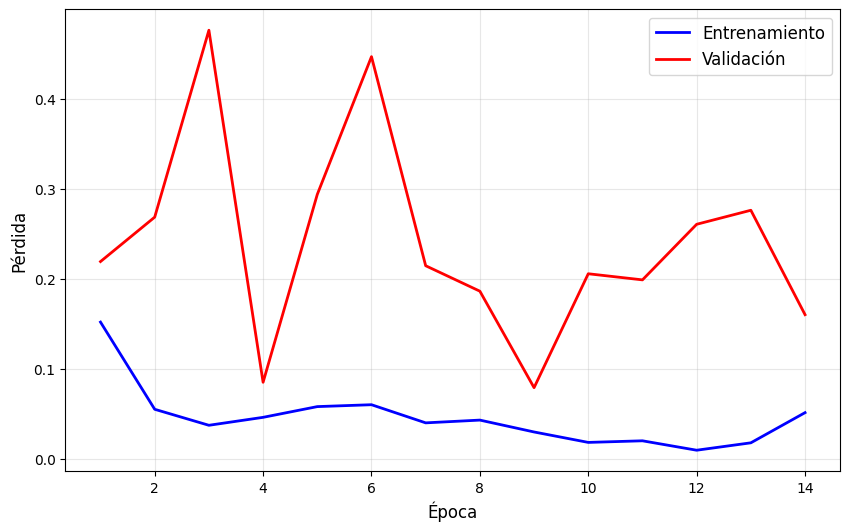

In [ ]:
# Gráficas del mejor modelo (VGG16 con aumento de datos y balanceo)
import matplotlib.pyplot as plt

# Gráfica de pérdidas del Modelo 3
plt.figure(figsize=(10, 6))
plt.plot(metrics_3_df['Epoch'], metrics_3_df['Train_Loss'], 'b-', label='Entrenamiento', linewidth=2)
plt.plot(metrics_3_df['Epoch'], metrics_3_df['Val_Loss'], 'r-', label='Validación', linewidth=2)

plt.xlabel('Época', fontsize=12)
plt.ylabel('Pérdida', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

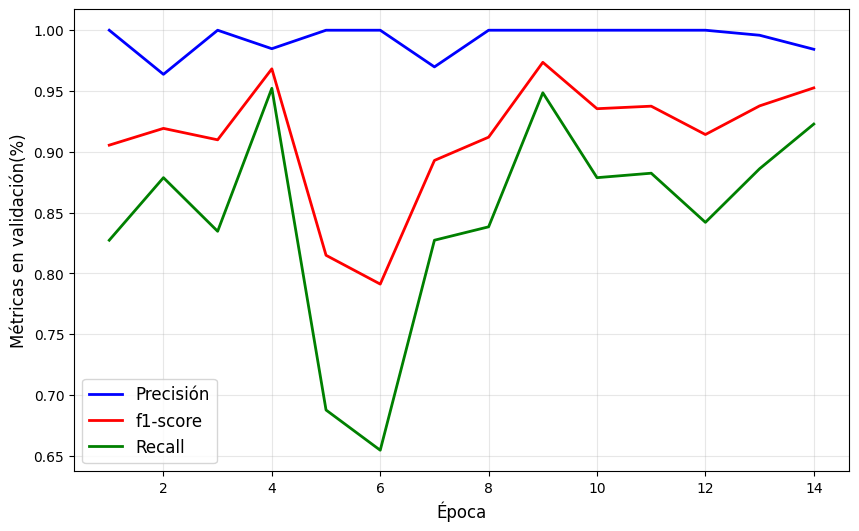

In [38]:
# Gráfica de Accuracy del Modelo 3
plt.figure(figsize=(10, 6))
plt.plot(metrics_3_df['Epoch'], metrics_3_df['Val_Precision'], 'b-', label='Precisión', linewidth=2)
plt.plot(metrics_3_df['Epoch'], metrics_3_df['Val_F1'], 'r-', label='f1-score', linewidth=2)
plt.plot(metrics_3_df['Epoch'], metrics_3_df['Val_Recall'], 'g-', label='Recall', linewidth=2)
plt.xlabel('Época', fontsize=12)
plt.ylabel('Métricas en validación(%)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()